# Noise, noise and more noise

## 1. Noise model

We define a function `add_noise` that will apply Pauli operators to a given `QuantumCircuit` based on the probabilities 
$\alpha$ and $\beta$. First we need to define our Pauli operators, to do this we simply create a set of wrapper functions that will apply the specified gate:

In [1]:
def apply_x_gate(circuit, qubit_index):
  """Applies an X gate to the specified qubit in the circuit."""

  circuit.x(qubit_index)

def apply_y_gate(circuit, qubit_index):
  """Applies an Y gate to the specified qubit in the circuit."""

  circuit.y(qubit_index)

def apply_z_gate(circuit, qubit_index):
  """Applies an Y gate to the specified qubit in the circuit."""

  circuit.z(qubit_index)

def apply_i_gate(circuit, qubit_index):
  """Applies an I gate to the specified qubit in the circuit.
     Knowing that X^2 = I, we can can say that applying twice the X gate, we obtain the expected result,
     since that means that we revert the previous X gate.
  """

  circuit.x(qubit_index)
  circuit.x(qubit_index)

In [2]:
from numpy.random import choice

def get_random_gate():
    return choice([apply_x_gate, apply_y_gate, apply_z_gate, apply_i_gate])
    

     ┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          


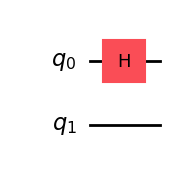

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)

#apply_x_gate(qc, 0)
print(qc)
qc.draw('mpl')

In [4]:
from qiskit import QuantumCircuit
from numpy import arange
from numpy.random import choice

def add_pauli_noise(circuit, a, b):
    """
    Adds Pauli noise to a given quantum circuit.

    Args:
        circuit: The quantum circuit to add noise to.
        a: Probability of Pauli noise after a one-qubit gate.
        b: Probability of Pauli noise after a two-qubit gate.

    Returns:
        The quantum circuit with added Pauli noise.
    """

    noisy_circuit = circuit.copy()
    
    for gate in circuit.data:
        gate_index = circuit.data.index(gate)
        
        if len(gate.qubits) == 2:  # Two-qubit gate
            print('two gate')

            if choice([True, False], p=[b, 1-b]):

                print('two gate')
                pauli_gate = get_random_gate()

                pauli_gate(noisy_circuit, gate_index)
                
        else:  # One-qubit gate
            if choice([True, False], p=[a, 1-a]):
                pauli_gate = get_random_gate()

                print('two gate')
                pauli_gate(noisy_circuit, gate_index)
                
    return noisy_circuit

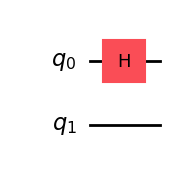

In [5]:
noisy_circuit = add_pauli_noise(qc, 0.3, 0.78)
noisy_circuit.draw('mpl')

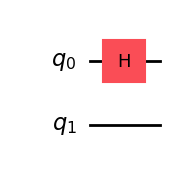

In [6]:
noisy_circuit = add_pauli_noise(qc, 0.3, 0.78)
noisy_circuit.draw('mpl')